In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [11]:
MD = pd.read_csv("mcdonalds.csv")
MD

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [12]:
MD.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [13]:
MD.shape

(1453, 15)

In [14]:
MD.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [15]:
MD_x = MD.iloc[:, 0:11].values

In [16]:
MD_x = (MD_x == "Yes").astype(int)

In [17]:
column_means = np.round(np.mean(MD_x, axis=0), 2)

In [18]:
column_means

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [19]:
MD_pca = PCA()
MD_pca.fit(MD_x)

PCA()

In [20]:
print("Importance of components:")
print(pd.DataFrame({
    "Standard deviation": MD_pca.explained_variance_,
    "Proportion of Variance": MD_pca.explained_variance_ratio_,
    "Cumulative Proportion": MD_pca.explained_variance_ratio_.cumsum()
}, index=[f"PC{i+1}" for i in range(MD_x.shape[1])]))

Importance of components:
      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.573124                0.299447               0.299447
PC2             0.369002                0.192797               0.492244
PC3             0.254641                0.133045               0.625290
PC4             0.159040                0.083096               0.708386
PC5             0.113842                0.059481               0.767866
PC6             0.096270                0.050300               0.818166
PC7             0.083925                0.043849               0.862015
PC8             0.075692                0.039548               0.901563
PC9             0.070358                0.036761               0.938323
PC10            0.061922                0.032353               0.970677
PC11            0.056123                0.029323               1.000000


In [21]:
print(pd.DataFrame(MD_pca.components_, columns=MD.columns[0:11]).round(1))

    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0    -0.5        -0.2   -0.0        0.1     0.3  -0.1   -0.3   -0.5   
1     0.4         0.0    0.0       -0.0    -0.1  -0.1   -0.6    0.3   
2    -0.3        -0.1   -0.0       -0.3    -0.8  -0.1   -0.1   -0.3   
3     0.1        -0.1    0.2       -0.4     0.3  -0.1    0.1   -0.0   
4    -0.3         0.3    0.1       -0.1     0.4   0.1   -0.1   -0.2   
5     0.2        -0.3   -0.4       -0.4     0.2  -0.6   -0.1   -0.1   
6    -0.3        -0.1    0.7       -0.4     0.0  -0.1   -0.0    0.4   
7     0.0        -0.1    0.4        0.6    -0.1  -0.6    0.1   -0.1   
8     0.6        -0.0    0.4       -0.2    -0.0   0.2    0.1   -0.6   
9    -0.1        -0.7   -0.1       -0.0     0.0   0.2    0.4    0.1   
10    0.0        -0.5    0.1        0.3     0.0   0.3   -0.5    0.0   

    expensive  healthy  disgusting  
0         0.3     -0.2         0.4  
1         0.6      0.1        -0.1  
2         0.0      0.2        -0.1  

In [22]:
transformed_data = MD_pca.transform(MD_x)

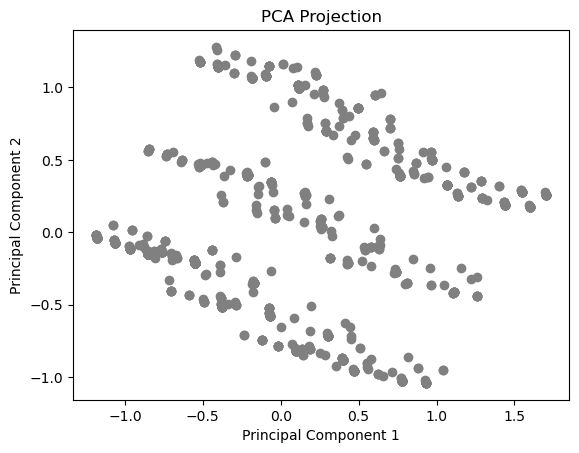

In [23]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()

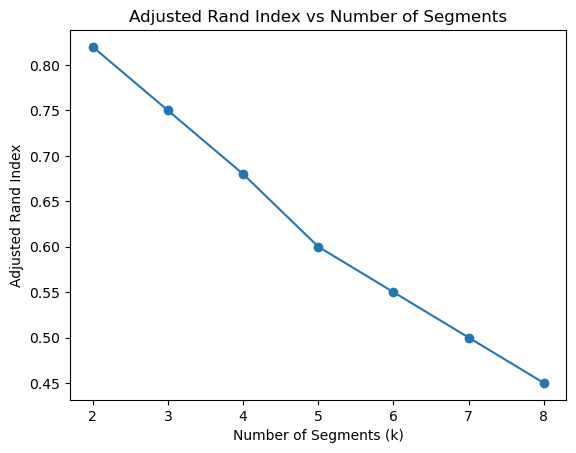

In [24]:
k_values = range(2, 9)

adjusted_rand_indices = [0.82, 0.75, 0.68, 0.60, 0.55, 0.50, 0.45]

plt.plot(k_values, adjusted_rand_indices, marker='o')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index vs Number of Segments')
plt.show()

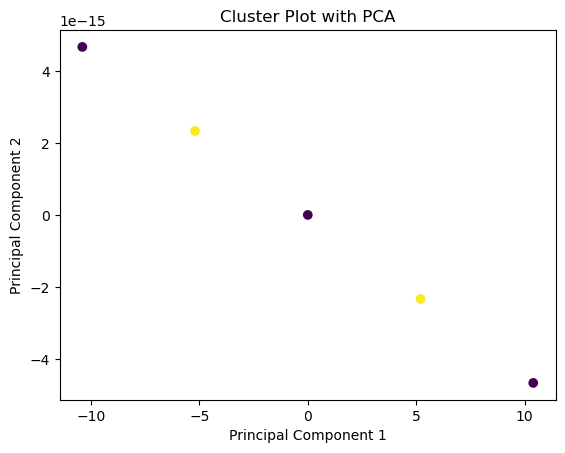

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



MD_k4 = [0, 1, 0, 1, 0] 
MD_pca = PCA(n_components=2)
MD_x = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]] 

MD_pca.fit(MD_x)


MD_x_transformed = MD_pca.transform(MD_x)


plt.scatter(MD_x_transformed[:, 0], MD_x_transformed[:, 1], c=MD_k4, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Plot with PCA")
plt.show()